In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install category_encoders
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from seaborn import lmplot
from seaborn import boxplot
from seaborn import violinplot
from seaborn import kdeplot
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, mean_squared_error, make_scorer, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("Datos_AbcWorld.xlsx")
df.head()

,Estudiantes,puntaje_juego1,puntaje_juego2,puntaje_juego3,puntaje_juego4,tiempo de juego(minutos),puntaje_total,Rendimiento
0,Estudiante 1,6,25,23,18,15,72,Medio
1,Estudiante 2,5,20,35,24,15,84,Alto
2,Estudiante 3,6,16,27,25,15,74,Medio
3,Estudiante 4,5,31,22,37,15,95,Alto
4,Estudiante 5,5,18,22,29,15,74,Medio


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Estudiantes               30 non-null     object
 1   puntaje_juego1            30 non-null     int64 
 2   puntaje_juego2            30 non-null     int64 
 3   puntaje_juego3            30 non-null     int64 
 4   puntaje_juego4            30 non-null     int64 
 5   tiempo de juego(minutos)  30 non-null     int64 
 6   puntaje_total             30 non-null     int64 
 7   Rendimiento               30 non-null     object
dtypes: int64(6), object(2)
memory usage: 2.0+ KB


In [ ]:
df.columns[df.any()]

Index(['Estudiantes', 'puntaje_juego1', 'puntaje_juego2', 'puntaje_juego3',
       'puntaje_juego4', 'tiempo de juego(minutos)', 'puntaje_total',
       'Rendimiento'],
      dtype='object')

In [ ]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > -1]
miss.sort_values(inplace=True)
miss

,0
Estudiantes,0.0
puntaje_juego1,0.0
puntaje_juego2,0.0
puntaje_juego3,0.0
puntaje_juego4,0.0
tiempo de juego(minutos),0.0
puntaje_total,0.0
Rendimiento,0.0


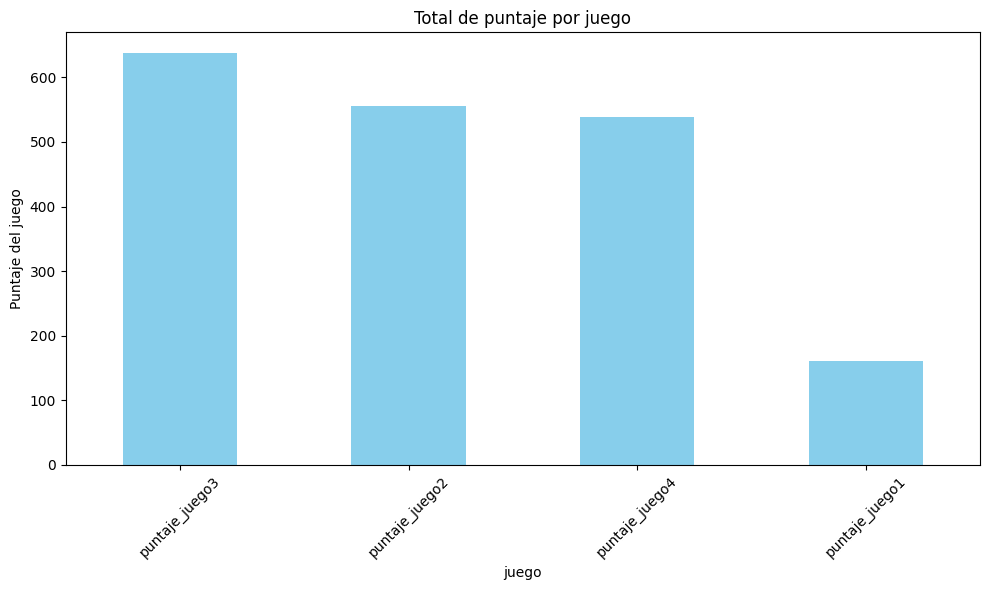

In [ ]:
juego_mas_jugado = ['puntaje_juego1', 'puntaje_juego2', 'puntaje_juego3', 'puntaje_juego4']
puntaje_juego_mas_jugado = df[juego_mas_jugado].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
puntaje_juego_mas_jugado.plot(kind='bar', color='skyblue')

plt.title('Total de puntaje por juego')
plt.xlabel('juego')
plt.ylabel('Puntaje del juego')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

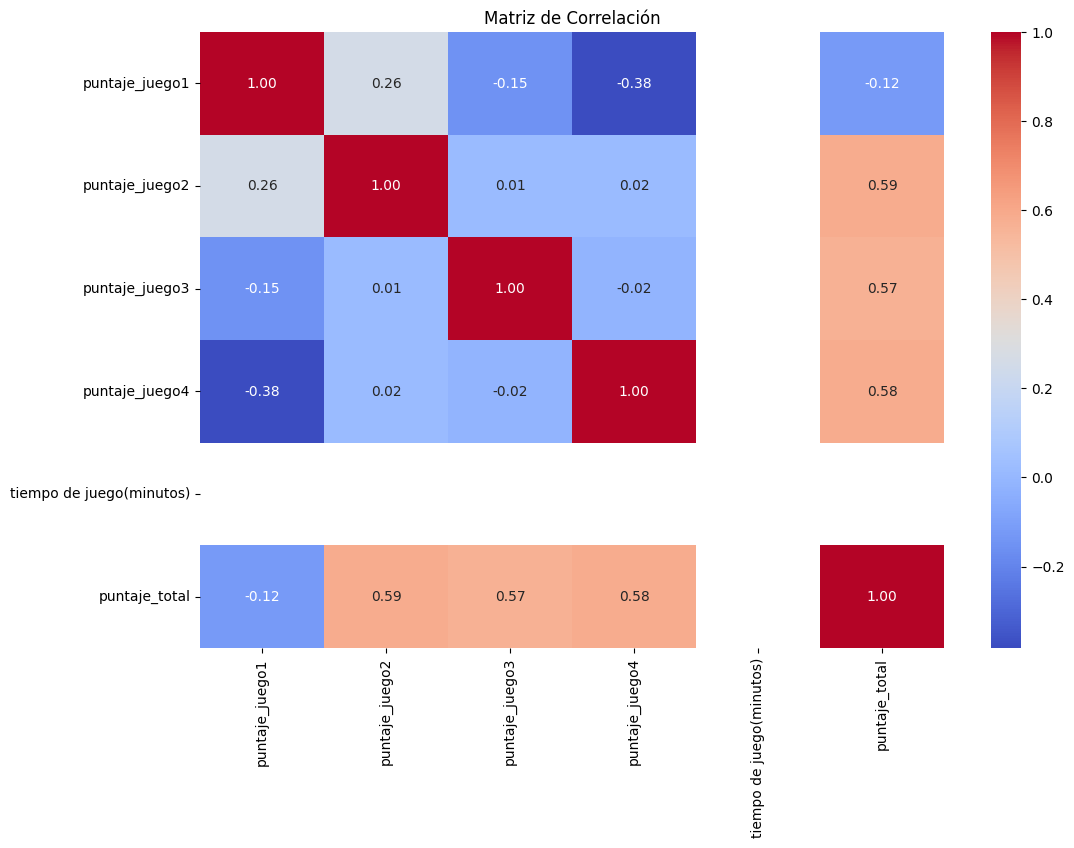

In [ ]:
correlaciones = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
ds = pd.read_excel('Datos_AbcWorld.xlsx')

In [ ]:
ds_cleaned = ds.dropna(subset=['puntaje_juego1' , 'puntaje_juego2', 'puntaje_juego3', 'puntaje_juego4', 'Rendimiento'])
X = ds_cleaned[["puntaje_juego1" , "puntaje_juego2", "puntaje_juego3", "puntaje_juego4"]]
y = ds_cleaned["Rendimiento"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

confusion_matrix = confusion_matrix(y_test, predicciones)


precision = accuracy_score(y_test, predicciones)
print("Precisión:", precision)
print("Matrix de confusion: \n", confusion_matrix)

Precisión: 1.0
Matrix de confusion: 
 [[1 0]
 [0 5]]


Confusion Matrix (logistica Regression):
 [[1 0]
 [0 5]]


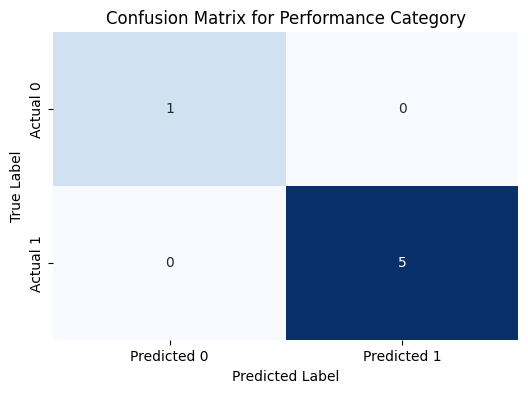

In [ ]:
cm_lr = confusion_matrix(y_test, predicciones)

print("Confusion Matrix (logistica Regression):\n", cm_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Performance Category')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


rf_clf.fit(X_train, y_train)


y_pred_rf = rf_clf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix (Random Forest):\n", cm_rf)

Random Forest Classifier Accuracy: 1.0000
Confusion Matrix (Random Forest):
 [[1 0]
 [0 5]]


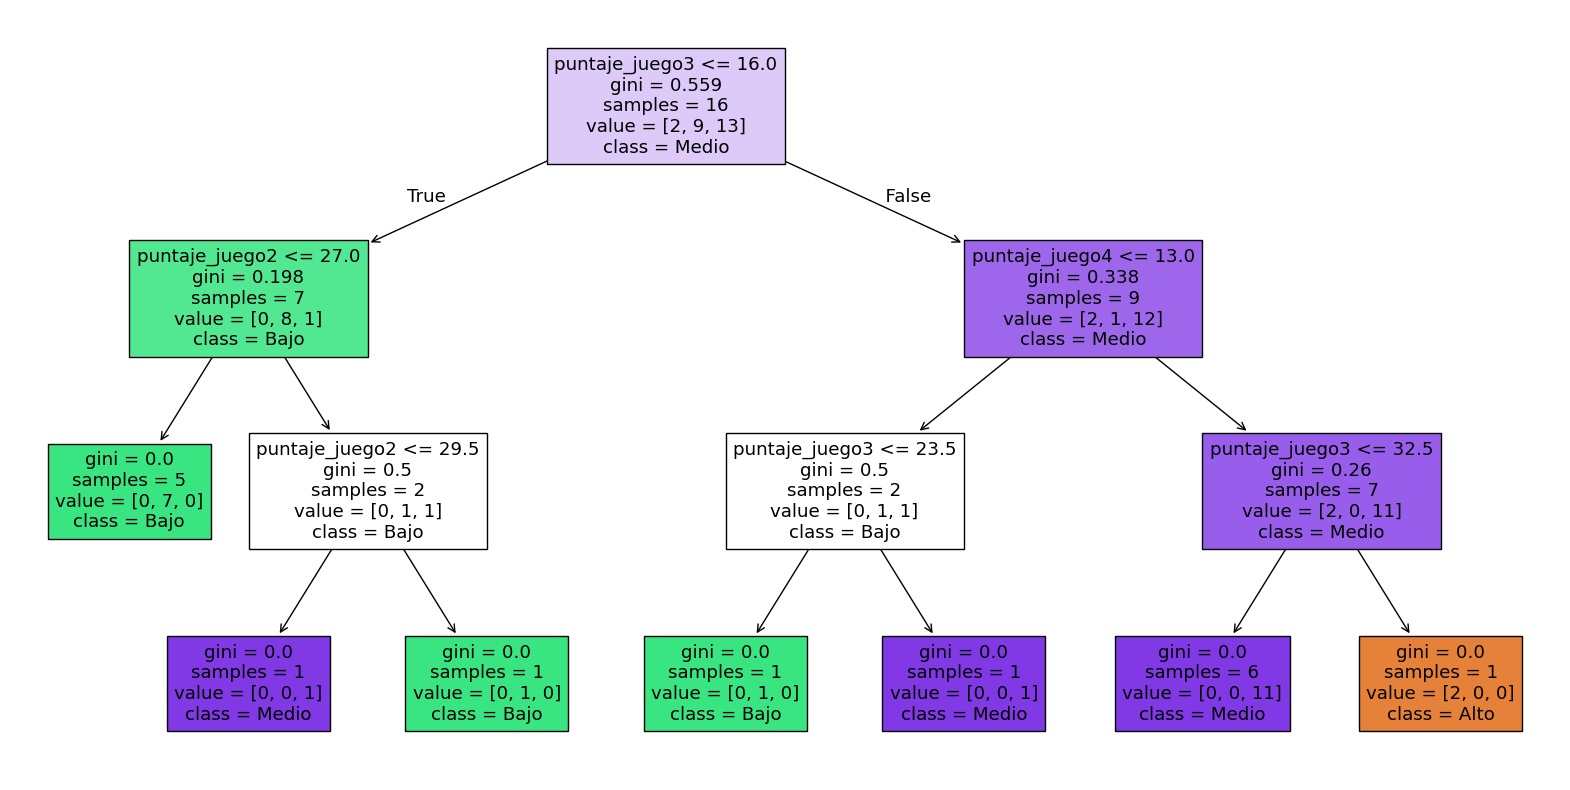

In [ ]:
tree = rf_clf.estimators_[3]
class_names = [str(cls) for cls in rf_clf.classes_]
features = ["puntaje_juego1" , "puntaje_juego2", "puntaje_juego3", "puntaje_juego4"]

# Imprimir Arbol
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=class_names, filled=True)
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)


knn_clf.fit(X_train, y_train)


y_pred_knn = knn_clf.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Classifier Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix (K-Nearest Neighbors):\n", cm_knn)

K-Nearest Neighbors Classifier Accuracy: 0.8333
Confusion Matrix (K-Nearest Neighbors):
 [[1 0]
 [1 4]]
